# Practica 3: Histograma para generar vectores de caractersticas

### 1. Objetivos

El alumno:
* Aprendera a calcular el histograma global y local de la imagen
* Entendera como calcular la distancia de error entre dos histogramas

### 2. Introduccion


### 3. Desarrollo

In [1]:
import cv2
from skimage import util
from skimage import exposure
from skimage.filters import rank
from skimage import img_as_ubyte
from scipy import signal
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A.1 Ecualizacion local

# Realizar la ecualizacion del histograma, de forma local en una ventana nxn
def local_hist_eq(im, n):
    grays = np.arange(256)        # Niveles de gris
    for 

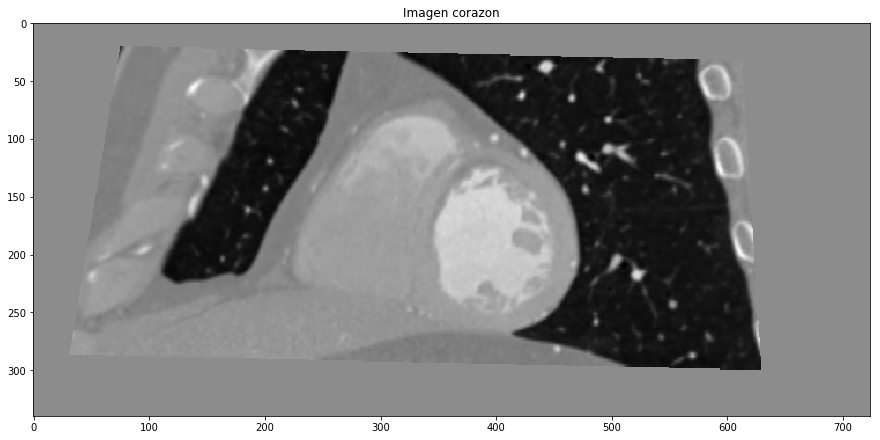

In [2]:
im = cv2.imread('im_1_8.png', 0)

plt.figure(figsize=(15,15))
plt.imshow(im, cmap='gray')
plt.title('Imagen corazon')
plt.show()

In [3]:
# Ecualizacion local de la imagen 
im_local_eq7 = rank.equalize(im, selem=np.ones((7,7)))
im_local_eq11 = rank.equalize(im, selem=np.ones((11,11)))

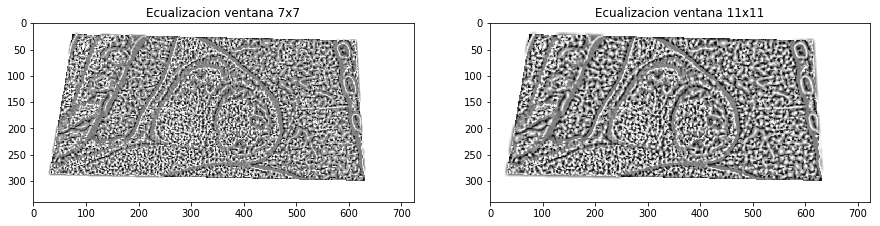

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im_local_eq7, cmap='gray')
plt.title('Ecualizacion ventana 7x7')
plt.subplot(122)
plt.imshow(im_local_eq11, cmap='gray')
plt.title('Ecualizacion ventana 11x11')
plt.show()

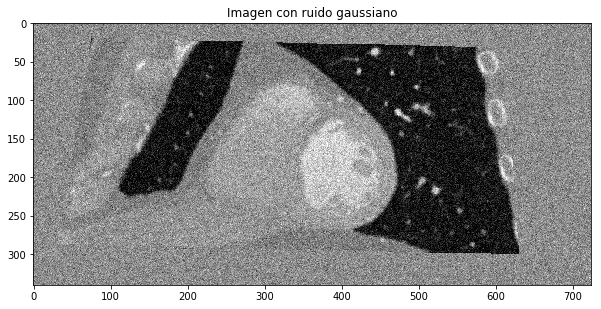

In [5]:
# Agregar ruido gaussiano a la imagen
im_noise = util.random_noise(im, mode='gaussian', var=0.01)

plt.figure(figsize=(10,10))
plt.imshow(im_noise, cmap='gray')
plt.title('Imagen con ruido gaussiano')
plt.show()

In [6]:
# Ecualizacion de las imagenes con ruido
im_nleq33 = rank.equalize(im, selem=np.ones((3,3)))
im_nleq55 = rank.equalize(im, selem=np.ones((15,15)))

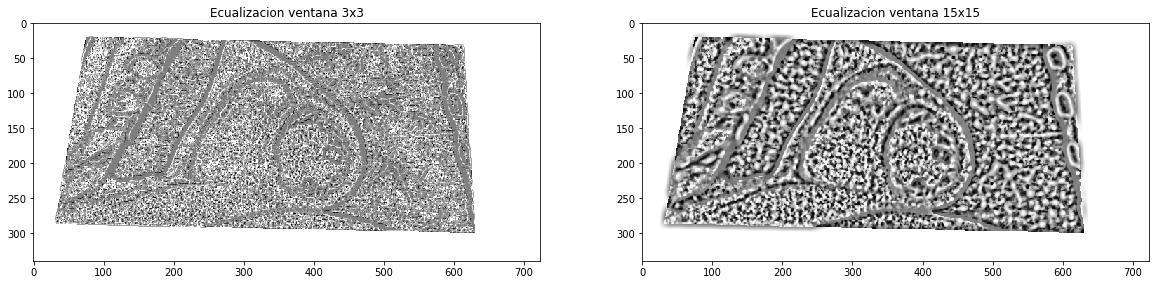

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(im_nleq33, cmap='gray')
plt.title('Ecualizacion ventana 3x3')
plt.subplot(122)
plt.imshow(im_nleq55, cmap='gray')
plt.title('Ecualizacion ventana 15x15')
plt.show()

### A.2 Distancia Chi-Square entre histogramas


In [30]:
# Leer 3 imagenes adicionales
images = []
for i in range(1,4):
    images.append(cv2.imread('im_1_'+str(i)+'.png', 0))

In [38]:
# Convolucion de la imagen con el filtro binomial 7x7
bin7 = np.array([1,6,15,20,15,6,1])                          
binKernel =  np.outer(bin7, bin7)       
binKernel = binKernel * (1/np.sum(binKernel)) 

imBinomial = signal.convolve2d(im, binKernel, 'same')

# Convolucion del filtro binomial con las 3 imagenes
images_binomial = []

for i in range(3):
    images_binomial.append(signal.convolve2d(images[i], binKernel, 'same'))

In [47]:
# Concatenacion de las imagenes filtradas
a1 = np.hstack((imBinomial, images_binomial[0]))
a2 = np.hstack((images_binomial[1], images_binomial[2]))
a3 = np.vstack((a1, a2))

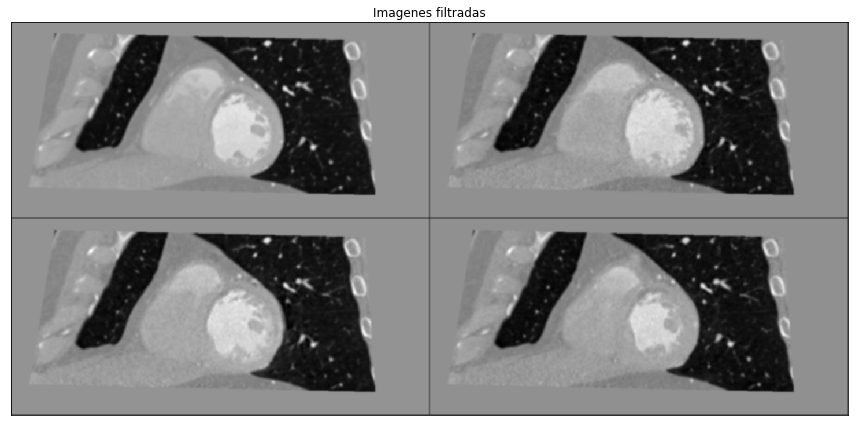

In [49]:
plt.figure(figsize=(15,10))
plt.imshow(a3, cmap='gray')
plt.title('Imagenes filtradas')
plt.xticks([])
plt.yticks([])
plt.show()

In [50]:
# Calculo de los histogramas

im_hist = exposure.histogram(im, nbins=256)
im_bhist = exposure.histogram(imBinomial, nbins=256)
im_b1hist = exposure.histogram(images_binomial[0], nbins=256)
im_b2hist = exposure.histogram(images_binomial[1], nbins=256)
im_b3hist = exposure.histogram(images_binomial[2], nbins=256)

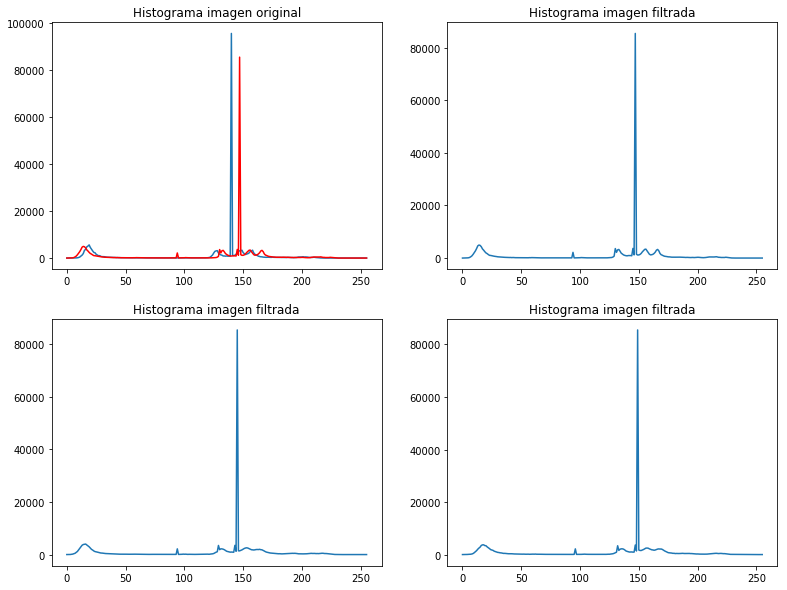

In [53]:
plt.figure(figsize=(13,10))
plt.subplot(221)
plt.plot(im_hist[0])
plt.plot(im_bhist[0], 'r')
plt.title('Histograma imagen original')
plt.subplot(222)
plt.plot(im_bhist[0])
plt.title('Histograma imagen filtrada')
plt.subplot(223)
plt.plot(im_b1hist[0])
plt.title('Histograma imagen filtrada')
plt.subplot(224)
plt.plot(im_b2hist[0])
plt.title('Histograma imagen filtrada')
plt.show()

In [16]:
def chi_square(hist1, hist2):
    d = 0
    for n1, n2 in zip(hist1, hist2):
        d += np.square(n1-n2)
    return d

In [21]:
print('Distancia entre histogramas: ', chi_square(im_hist[0], im_bhist[0]))
print('Distancia histograma imagen original:', chi_square(im_hist[0], im_hist[0]))

Distancia entre histogramas:  15915168348
Distancia histograma imagen original: 0


In [22]:
'''
https://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons
https://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/theano/

'''

'\nhttps://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons\nhttps://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box\nhttp://deeplearning.net/software/pylearn2/\nhttp://deeplearning.net/software/theano/\n\n'

### B.1 Reconocimiento mediante analisis del histograma